In [31]:
# 한글 패치
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [32]:
data <- read.csv('./data.csv' )

In [33]:
table(is.na(data))


  FALSE    TRUE 
3766033     152 

In [34]:
data <- na.omit(data)

In [35]:
head(data)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500,2.0 V6 TB
2,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,,- (g/km),190000,"Q4 Allrad, 3.2L GTA"
3,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,,- (g/km),129000,ALFA ROME 916
4,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500,2.0 16V Twin Spark L
5,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127,"3.0i Super V6, absoluter Topzustand !"
6,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307,2.0 16V Twin Spark


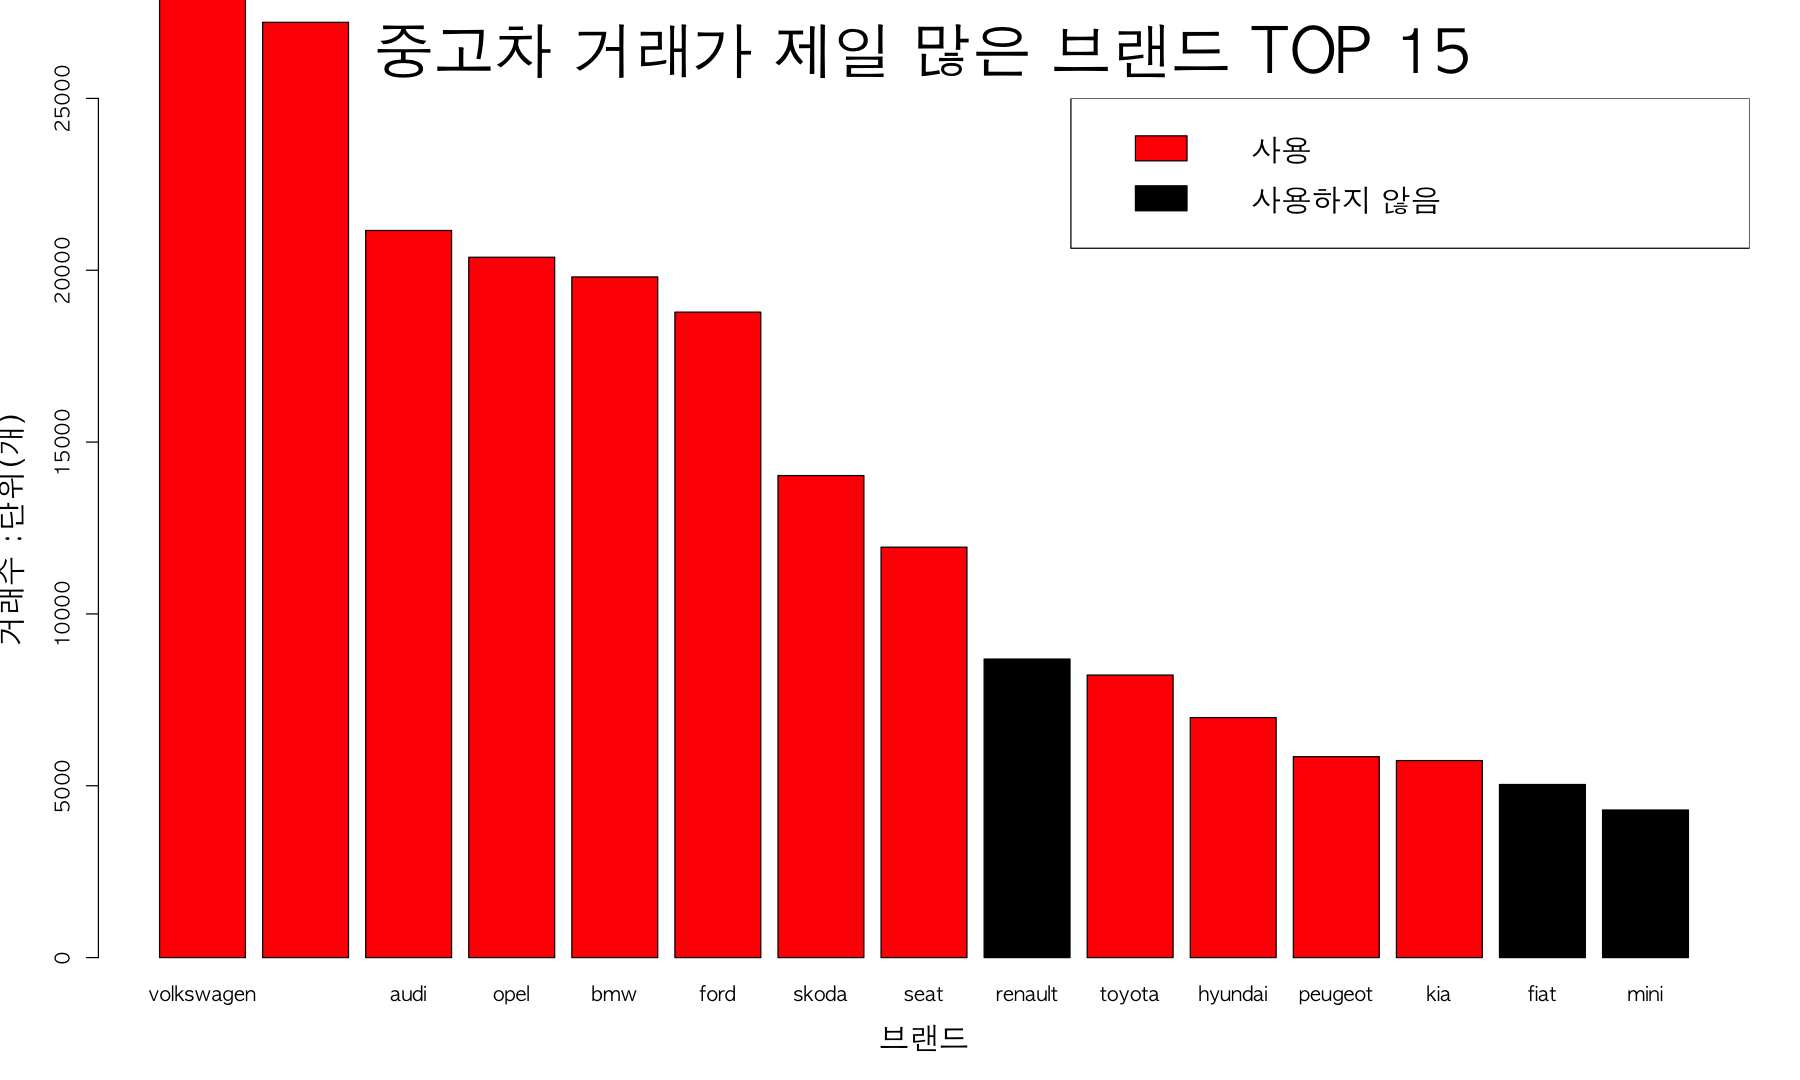

In [36]:



par(family = 'AppleGothic',bg= 'white')
barplot(head(sort(table(data$brand), decreasing = TRUE),15) , 
main = '중고차 거래가 제일 많은 브랜드 TOP 15' ,
xlab = '브랜드',
ylab = '거래수 :단위(개)',
ylim = c(0,25000), 
col = c(rep('red',8),'black',c(rep('red',4),c(rep('black',2))) ),
cex.main = 3,
cex.lab = 1.5,


)
legend("topright", legend = c("사용", "사용하지 않음"), fill = c("red", "black") , cex = 1.5)

In [37]:
head(sort(table(data$brand), decreasing = TRUE),15)[c(9,14,15)]


renault    fiat    mini 
   8687    5037    4295 

In [38]:
data <- data[,-c(1,5,13,15)]

In [39]:
benz <- subset(data, data$brand == 'mercedes-benz')

In [40]:
head(benz)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
102022,mercedes-benz,Mercedes-Benz SL 500,blue,1995,39900,235,320,Automatic,Petrol,"14,3 l/100 km",53334
102023,mercedes-benz,Mercedes-Benz E 220,blue,1995,4499,110,150,Manual,Petrol,,193040
102024,mercedes-benz,Mercedes-Benz E 220,blue,1995,4000,110,150,Manual,Petrol,"8,7 l/100 km",197000
102025,mercedes-benz,Mercedes-Benz SL 280,blue,1995,21900,142,193,Automatic,Petrol,,149900
102026,mercedes-benz,Mercedes-Benz E 320,blue,1995,27990,,,Automatic,Petrol,,187000
102027,mercedes-benz,Mercedes-Benz SL 320,blue,1995,22999,170,231,Automatic,Petrol,- (l/100 km),159800


사용하지 않을 컬럼 삭제   
x 는 의미없는 컬럼
offer_description 는 판매 문구
registration_date 는 year 컬럼과 정보가 같다
fuel_consumption_g_km 는 배기량인데 사용자가 이걸 혼자서 알 수 없다
X,  offer_description, registration_date, fuel_consumption_g_km 삭제 

In [41]:
head(benz)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
102022,mercedes-benz,Mercedes-Benz SL 500,blue,1995,39900,235,320,Automatic,Petrol,"14,3 l/100 km",53334
102023,mercedes-benz,Mercedes-Benz E 220,blue,1995,4499,110,150,Manual,Petrol,,193040
102024,mercedes-benz,Mercedes-Benz E 220,blue,1995,4000,110,150,Manual,Petrol,"8,7 l/100 km",197000
102025,mercedes-benz,Mercedes-Benz SL 280,blue,1995,21900,142,193,Automatic,Petrol,,149900
102026,mercedes-benz,Mercedes-Benz E 320,blue,1995,27990,,,Automatic,Petrol,,187000
102027,mercedes-benz,Mercedes-Benz SL 320,blue,1995,22999,170,231,Automatic,Petrol,- (l/100 km),159800


In [86]:
table(is.na(benz))


 FALSE 
263010 

In [43]:
nrow(benz)

[1] 27214

In [44]:
summary(benz)

    brand              model              color               year          
 Length:27214       Length:27214       Length:27214       Length:27214      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 price_in_euro        power_kw           power_ps         transmission_type 
 Length:27214       Length:27214       Length:27214       Length:27214      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

빈칸(결측치 제거)

In [45]:
str(benz)

'data.frame':	27214 obs. of  11 variables:
 $ brand                   : chr  "mercedes-benz" "mercedes-benz" "mercedes-benz" "mercedes-benz" ...
 $ model                   : chr  "Mercedes-Benz SL 500" "Mercedes-Benz E 220" "Mercedes-Benz E 220" "Mercedes-Benz SL 280" ...
 $ color                   : chr  "blue" "blue" "blue" "blue" ...
 $ year                    : chr  "1995" "1995" "1995" "1995" ...
 $ price_in_euro           : chr  "39900" "4499" "4000" "21900" ...
 $ power_kw                : chr  "235" "110" "110" "142" ...
 $ power_ps                : chr  "320" "150" "150" "193" ...
 $ transmission_type       : chr  "Automatic" "Manual" "Manual" "Automatic" ...
 $ fuel_type               : chr  "Petrol" "Petrol" "Petrol" "Petrol" ...
 $ fuel_consumption_l_100km: chr  "14,3 l/100 km" "" "8,7 l/100 km" "" ...
 $ mileage_in_km           : num  53334 193040 197000 149900 187000 ...


In [46]:
head(benz)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
102022,mercedes-benz,Mercedes-Benz SL 500,blue,1995,39900,235,320,Automatic,Petrol,"14,3 l/100 km",53334
102023,mercedes-benz,Mercedes-Benz E 220,blue,1995,4499,110,150,Manual,Petrol,,193040
102024,mercedes-benz,Mercedes-Benz E 220,blue,1995,4000,110,150,Manual,Petrol,"8,7 l/100 km",197000
102025,mercedes-benz,Mercedes-Benz SL 280,blue,1995,21900,142,193,Automatic,Petrol,,149900
102026,mercedes-benz,Mercedes-Benz E 320,blue,1995,27990,,,Automatic,Petrol,,187000
102027,mercedes-benz,Mercedes-Benz SL 320,blue,1995,22999,170,231,Automatic,Petrol,- (l/100 km),159800


In [47]:
table(benz$fuel_type)


      02/1996       03/2017       03/2021       04/2000       05/2012 
            1             1             1             1             1 
      06/2009       10/2015       11/2014     Automatic           CNG 
            1             1             1             1            15 
       Diesel Diesel Hybrid      Electric        Hybrid           LPG 
        11697           247           290           442           114 
        Other        Petrol       Unknown 
            3         14390             7 

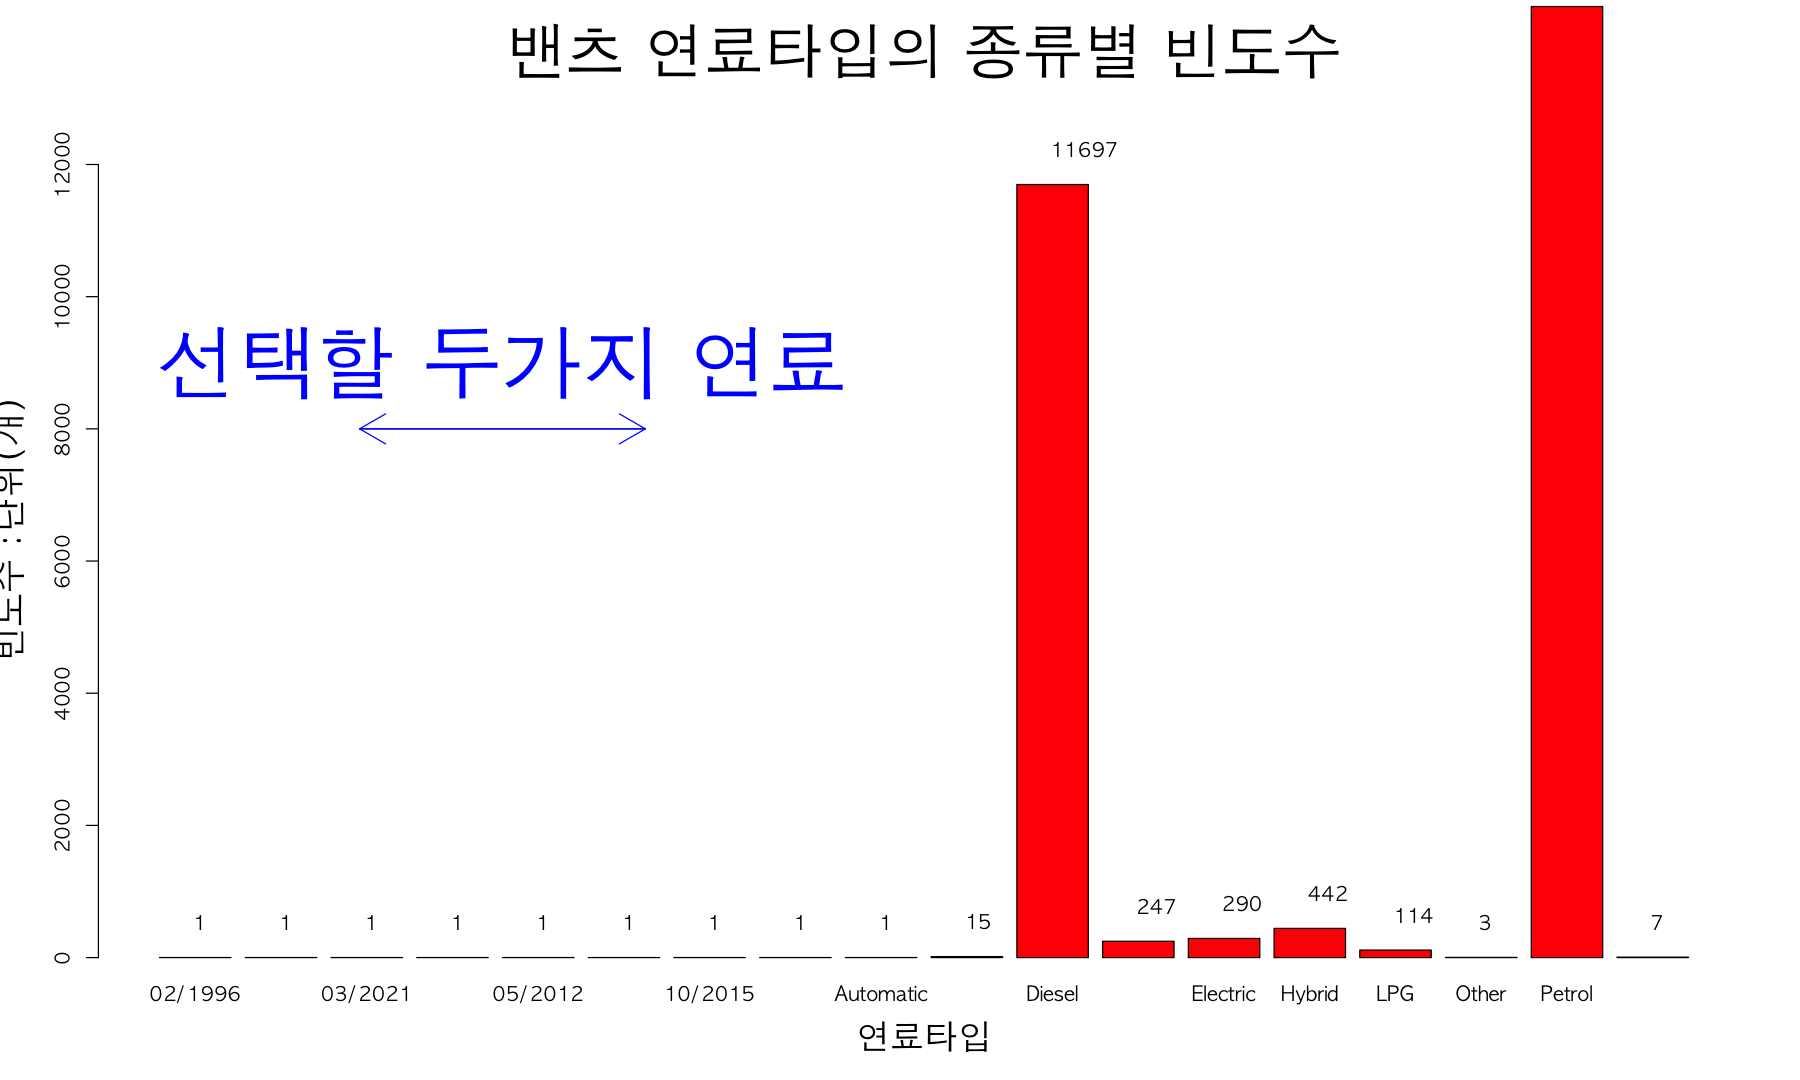

In [48]:
par(family = 'AppleGothic',bg= 'white')
barplot(table(benz$fuel_type),
main = '밴츠 연료타입의 종류별 빈도수',
xlab = '연료타입',
ylab = '빈도수 :단위(개)',
ylim = c(0,13000),
col = ifelse(table(benz$fuel_type) >= 100 , 'red','black'),
cex.lab = 1.7,
cex.main = 3,

)

arrows(3, 8000, 7, 8000, col = "blue")
arrows(7 , 8000, 3, 8000, col ='blue')
text(5, 9000, "선택할 두가지 연료",  cex = 4 ,font = 2 , col = 'blue')


for(i in 1:length(table(benz$fuel_type))) {
text((i-1)* 1.2 + 0.5,table(benz$fuel_type)[i]+500, table(benz$fuel_type)[i], pos =4 , col = 'black')

}

Other 인 차량 모델 확인 

In [87]:
subset(benz,fuel_type == 'Other' )

brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>


In [88]:
head(subset(benz, model == 'Mercedes-Benz GLC 350') ,3 )
mod1 <- subset(benz, model == 'Mercedes-Benz GLC 350')
nrow(subset(benz, model == 'Mercedes-Benz GLC 350'))


,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
118452,mercedes-benz,Mercedes-Benz GLC 350,silver,2016,35880,155,211,0,1,2.5,84608
119206,mercedes-benz,Mercedes-Benz GLC 350,blue,2017,29800,190,258,0,1,5.9,127750
119309,mercedes-benz,Mercedes-Benz GLC 350,blue,2017,42590,190,258,0,1,5.9,50000


[1] 68

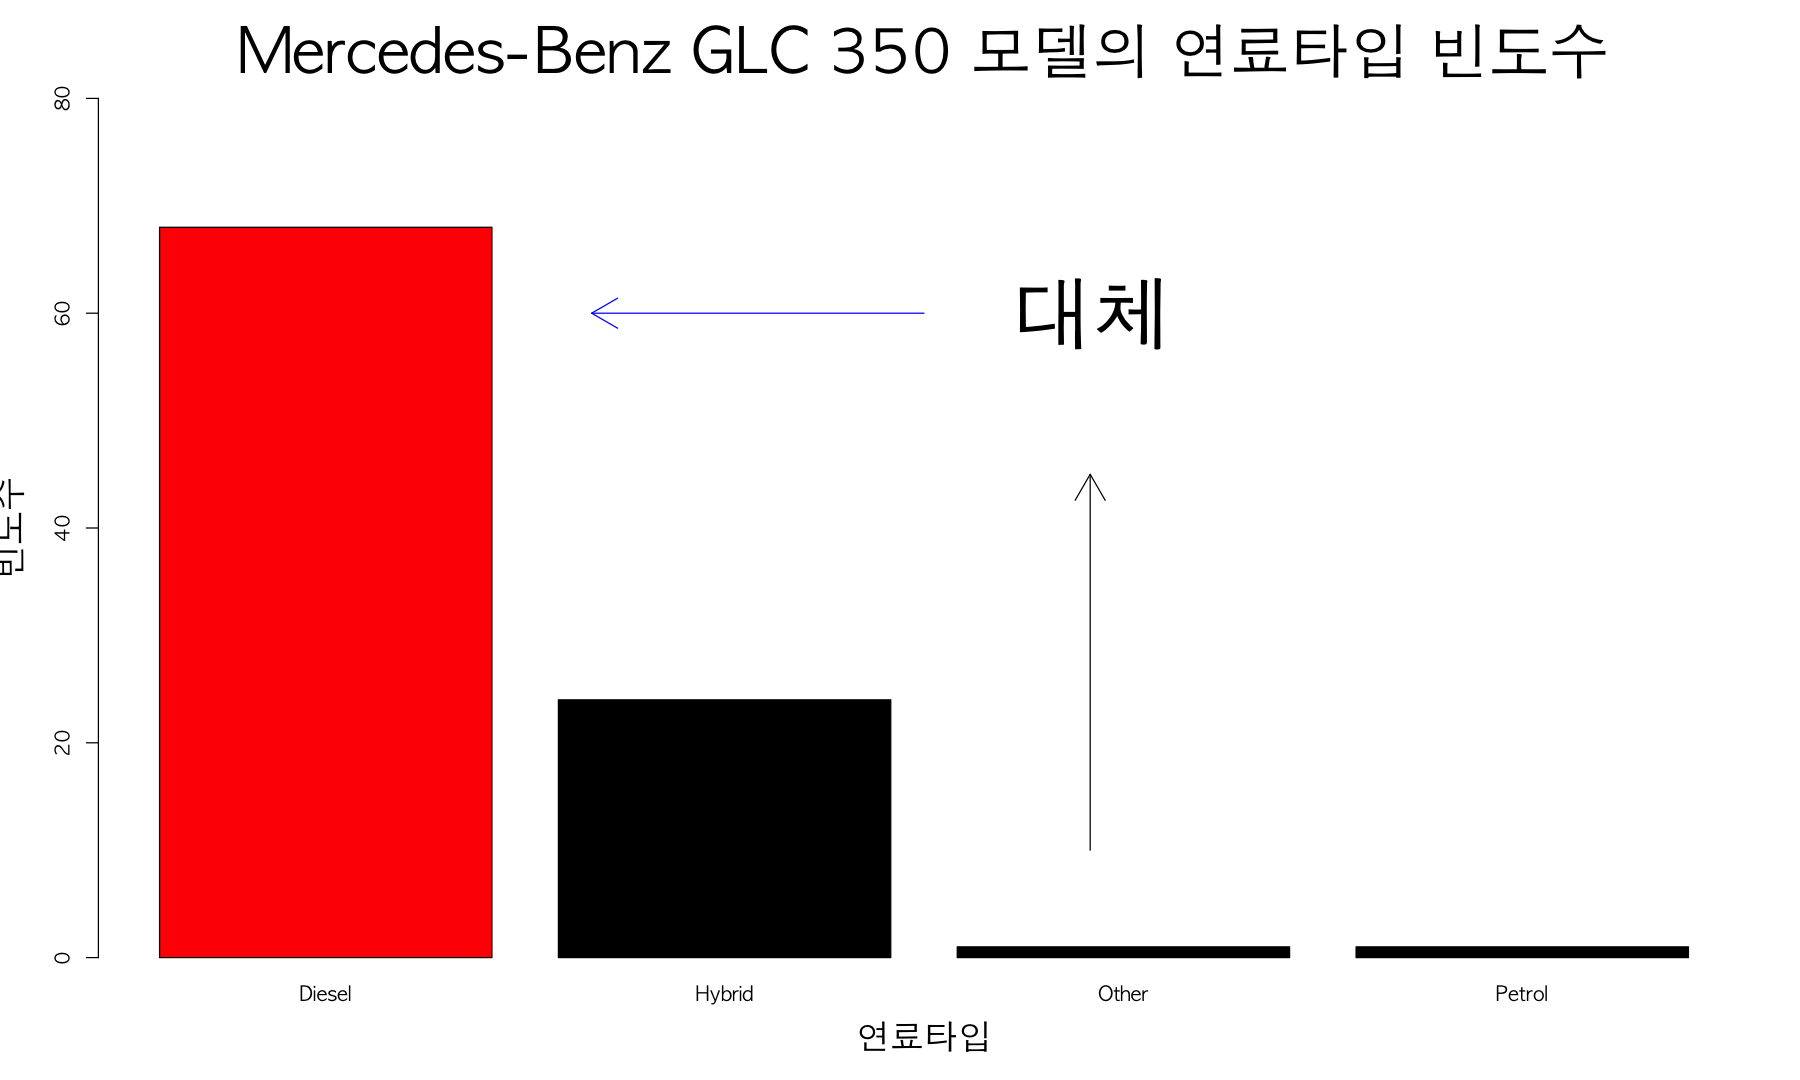

In [51]:
par(family = 'AppleGothic',bg= 'white')
barplot(table(mod1$fuel_type) ,
main = 'Mercedes-Benz GLC 350 모델의 연료타입 빈도수'
, cex.main = 3,
col = c('red',rep('black',3)),
xlab = '연료타입',
ylab = '빈도수',
cex.lab = 1.7,
ylim = c(0,80),

)
arrows(2.5, 60, 1.5, 60, col = "blue")
arrows(3 , 10, 3, 45)

text(3, 60, "대체",  cex = 4 ,font = 2 , col = )

제일 많은 빈도수로 대체

In [89]:
benz$fuel_type <- ifelse(benz$fuel_type =='Other' ,'Diesel',benz$fuel_type)


나머지 연료타입 제거(Diesel,Petrol 만 사용 )

In [90]:
benz <- subset(benz,fuel_type != 'Diesel Hybrid' )
benz <- subset(benz,fuel_type != 'LPG' )
benz <- subset(benz,fuel_type != 'Hybrid' )
benz <- subset(benz,fuel_type != 'CNG' )
table(benz$fuel_type)



    1 
23910 

In [54]:
head(benz)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
102022,mercedes-benz,Mercedes-Benz SL 500,blue,1995,39900,235,320,Automatic,Petrol,"14,3 l/100 km",53334
102023,mercedes-benz,Mercedes-Benz E 220,blue,1995,4499,110,150,Manual,Petrol,,193040
102024,mercedes-benz,Mercedes-Benz E 220,blue,1995,4000,110,150,Manual,Petrol,"8,7 l/100 km",197000
102025,mercedes-benz,Mercedes-Benz SL 280,blue,1995,21900,142,193,Automatic,Petrol,,149900
102026,mercedes-benz,Mercedes-Benz E 320,blue,1995,27990,,,Automatic,Petrol,,187000
102027,mercedes-benz,Mercedes-Benz SL 320,blue,1995,22999,170,231,Automatic,Petrol,- (l/100 km),159800


fuel_consumption_l_100km 컬럼 , -> . 로 변환하고 숫자화 

In [55]:
#benz$fuel_consumption_l_100km <- as.numeric(str_replace_all(benz$fuel_consumption_l_100km, ",", "."))

#table(benz$fuel_consumption_l_100km)

transmission_type, fuel_type 수치화 

In [56]:
table(benz$transmission_type)
table(benz$fuel_type)


     Automatic         Manual Semi-automatic        Unknown 
         20413           5834             31            118 


  02/1996   03/2017   03/2021   04/2000   05/2012   06/2009   10/2015   11/2014 
        1         1         1         1         1         1         1         1 
Automatic    Diesel  Electric    Petrol   Unknown 
        1     11700       290     14390         7 

In [57]:
benz$transmission_type <- as.numeric(ifelse(benz$transmission_type =='Automatic' ,'0','1'))
benz$fuel_type <- as.numeric(ifelse(benz$fuel_type =='Diesel  ' ,'0','1'))

In [58]:
head(benz)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
102022,mercedes-benz,Mercedes-Benz SL 500,blue,1995,39900,235,320,0,1,"14,3 l/100 km",53334
102023,mercedes-benz,Mercedes-Benz E 220,blue,1995,4499,110,150,1,1,,193040
102024,mercedes-benz,Mercedes-Benz E 220,blue,1995,4000,110,150,1,1,"8,7 l/100 km",197000
102025,mercedes-benz,Mercedes-Benz SL 280,blue,1995,21900,142,193,0,1,,149900
102026,mercedes-benz,Mercedes-Benz E 320,blue,1995,27990,,,0,1,,187000
102027,mercedes-benz,Mercedes-Benz SL 320,blue,1995,22999,170,231,0,1,- (l/100 km),159800


탑 3 모델 뽑기

In [59]:
head(sort(table(benz$model), decreasing = T),6)


Mercedes-Benz C 180 Mercedes-Benz C 200 Mercedes-Benz C 220 Mercedes-Benz E 220 
               1367                1296                1287                1030 
Mercedes-Benz E 200 Mercedes-Benz A 180 
                931                 912 

In [60]:
a <- head(sort(table(benz$model), decreasing = T),6)

In [61]:
head(sort(table(benz$model), decreasing = T),6)


Mercedes-Benz C 180 Mercedes-Benz C 200 Mercedes-Benz C 220 Mercedes-Benz E 220 
               1367                1296                1287                1030 
Mercedes-Benz E 200 Mercedes-Benz A 180 
                931                 912 

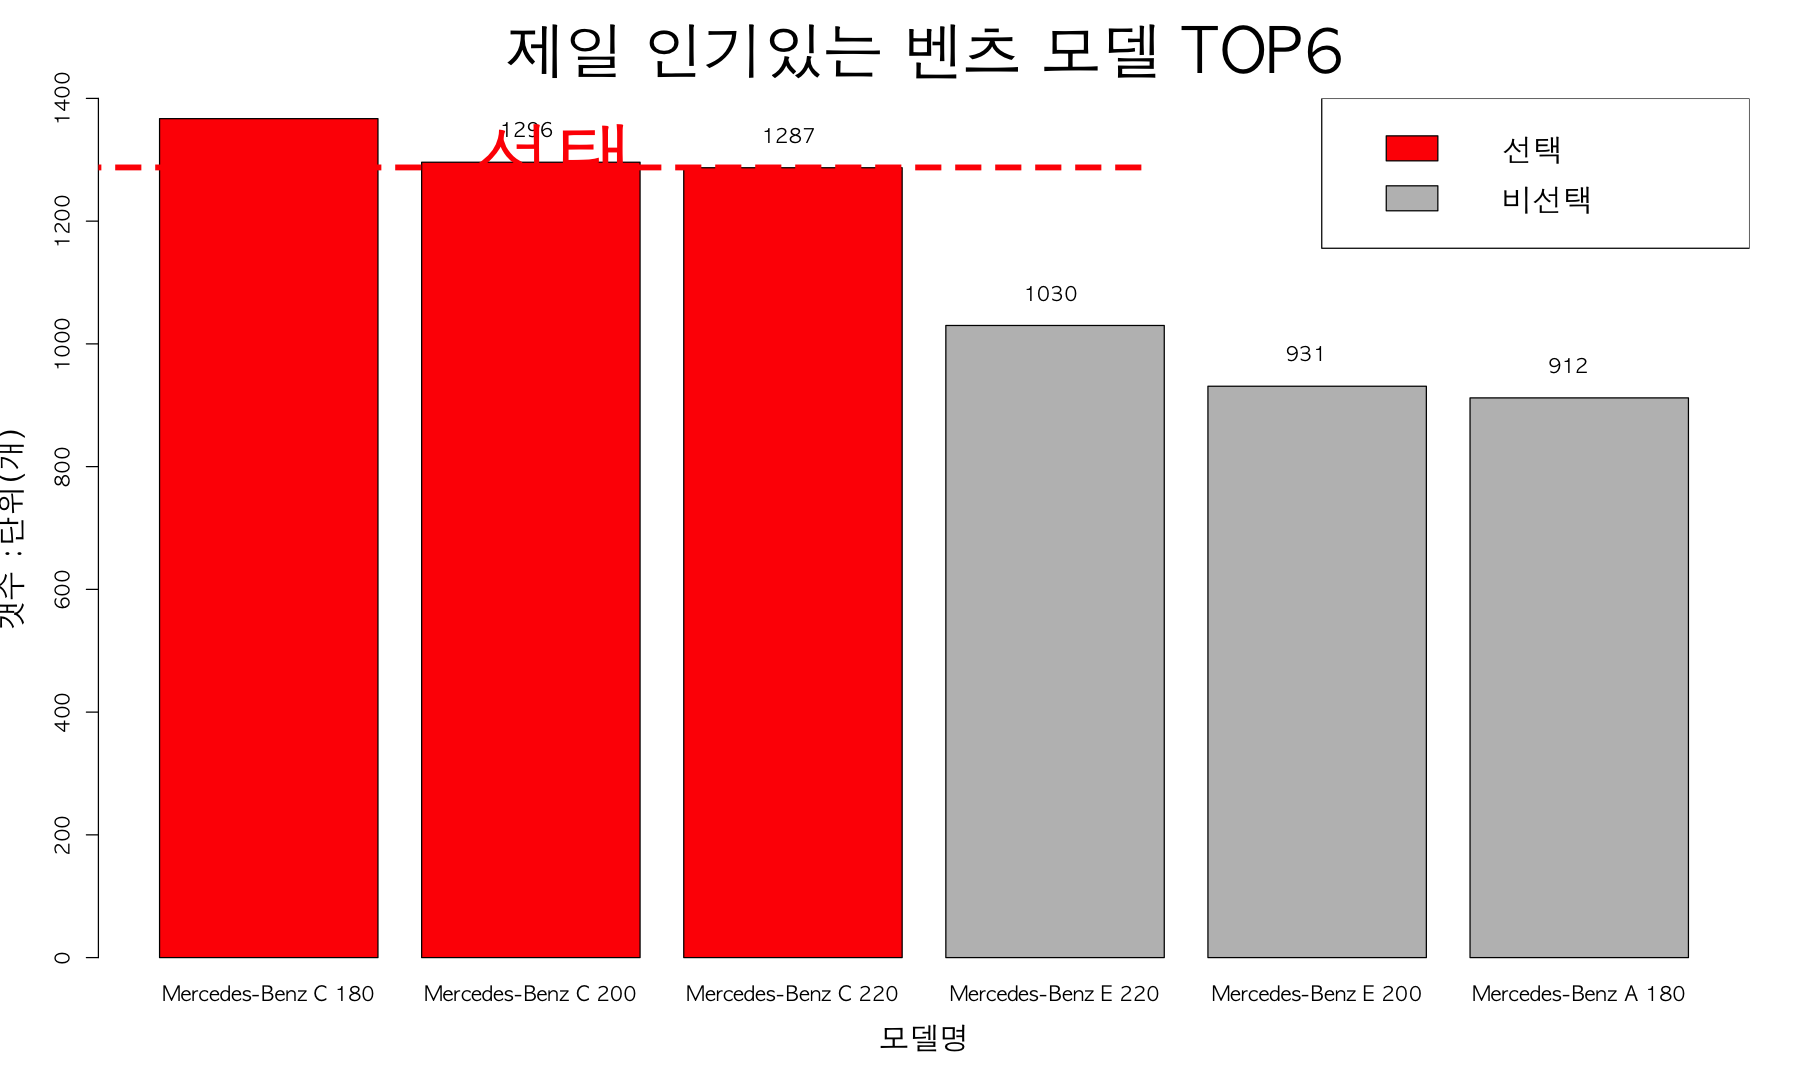

In [62]:
par(family = 'AppleGothic',bg= 'white')
barplot(head(sort(table(benz$model), decreasing = T),6)
, ylim = c(0,1400),
main = '제일 인기있는 벤츠 모델 TOP6',
cex.main =3,
col = c(rep('red',3),c(rep('gray',3))),
xlab = '모델명',
ylab = '갯수 :단위(개)',
cex.lab = 1.5,
)
legend("topright", legend = c("선택", "비선택"), fill = c("red", "gray") , cex = 1.5)

for(i in 1:length(a)){
text((i-1)* 1.2 + 0.5,a[i]+50, a[i], pos =4 , col = 'black')
}
text(2, 1300 , '-------------선택-------------' , cex = 4 , col = 'red')

In [146]:
 C_180 <- subset(benz, model == 'Mercedes-Benz C 180')
 C_200 <- subset(benz, model == 'Mercedes-Benz C 200')
 C_220 <- subset(benz, model == 'Mercedes-Benz C 220')

색깔정제

In [64]:
table(C_180$color)
table(C_200$color)
table(C_220$color)



 beige  black   blue bronze  brown   gold  green   grey    red silver violet 
    12    353    107      1      7      2      3    179     29    574      1 
 white 
    99 


 beige  black   blue bronze  brown   gold  green   grey    red silver  white 
     4    320    131      1      8      1      7    208     30    475    110 
yellow 
     1 


        beige  black   blue bronze  brown   gold  green   grey orange    red 
     2      4    323    172      2      5      1      8    202      1     29 
silver violet  white yellow 
   426      1    110      1 

In [91]:
head(C_180)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
102040,mercedes-benz,Mercedes-Benz C 180,blue,1995,2800,90,122,1,1,,196000
102050,mercedes-benz,Mercedes-Benz C 180,green,1995,1600,90,122,1,1,"9,2 l/100 km",196000
102062,mercedes-benz,Mercedes-Benz C 180,silver,1995,8500,90,122,0,1,"9,2 l/100 km",73000
102069,mercedes-benz,Mercedes-Benz C 180,silver,1995,2800,90,122,0,1,"9,2 l/100 km",210000
102070,mercedes-benz,Mercedes-Benz C 180,silver,1995,2950,90,122,1,1,"9,2 l/100 km",94800
102077,mercedes-benz,Mercedes-Benz C 180,silver,1995,2500,90,122,0,1,,164000


Unknown 데이터 발견

In [66]:
table(benz$transmission_type)


    0     1 
20413  5983 

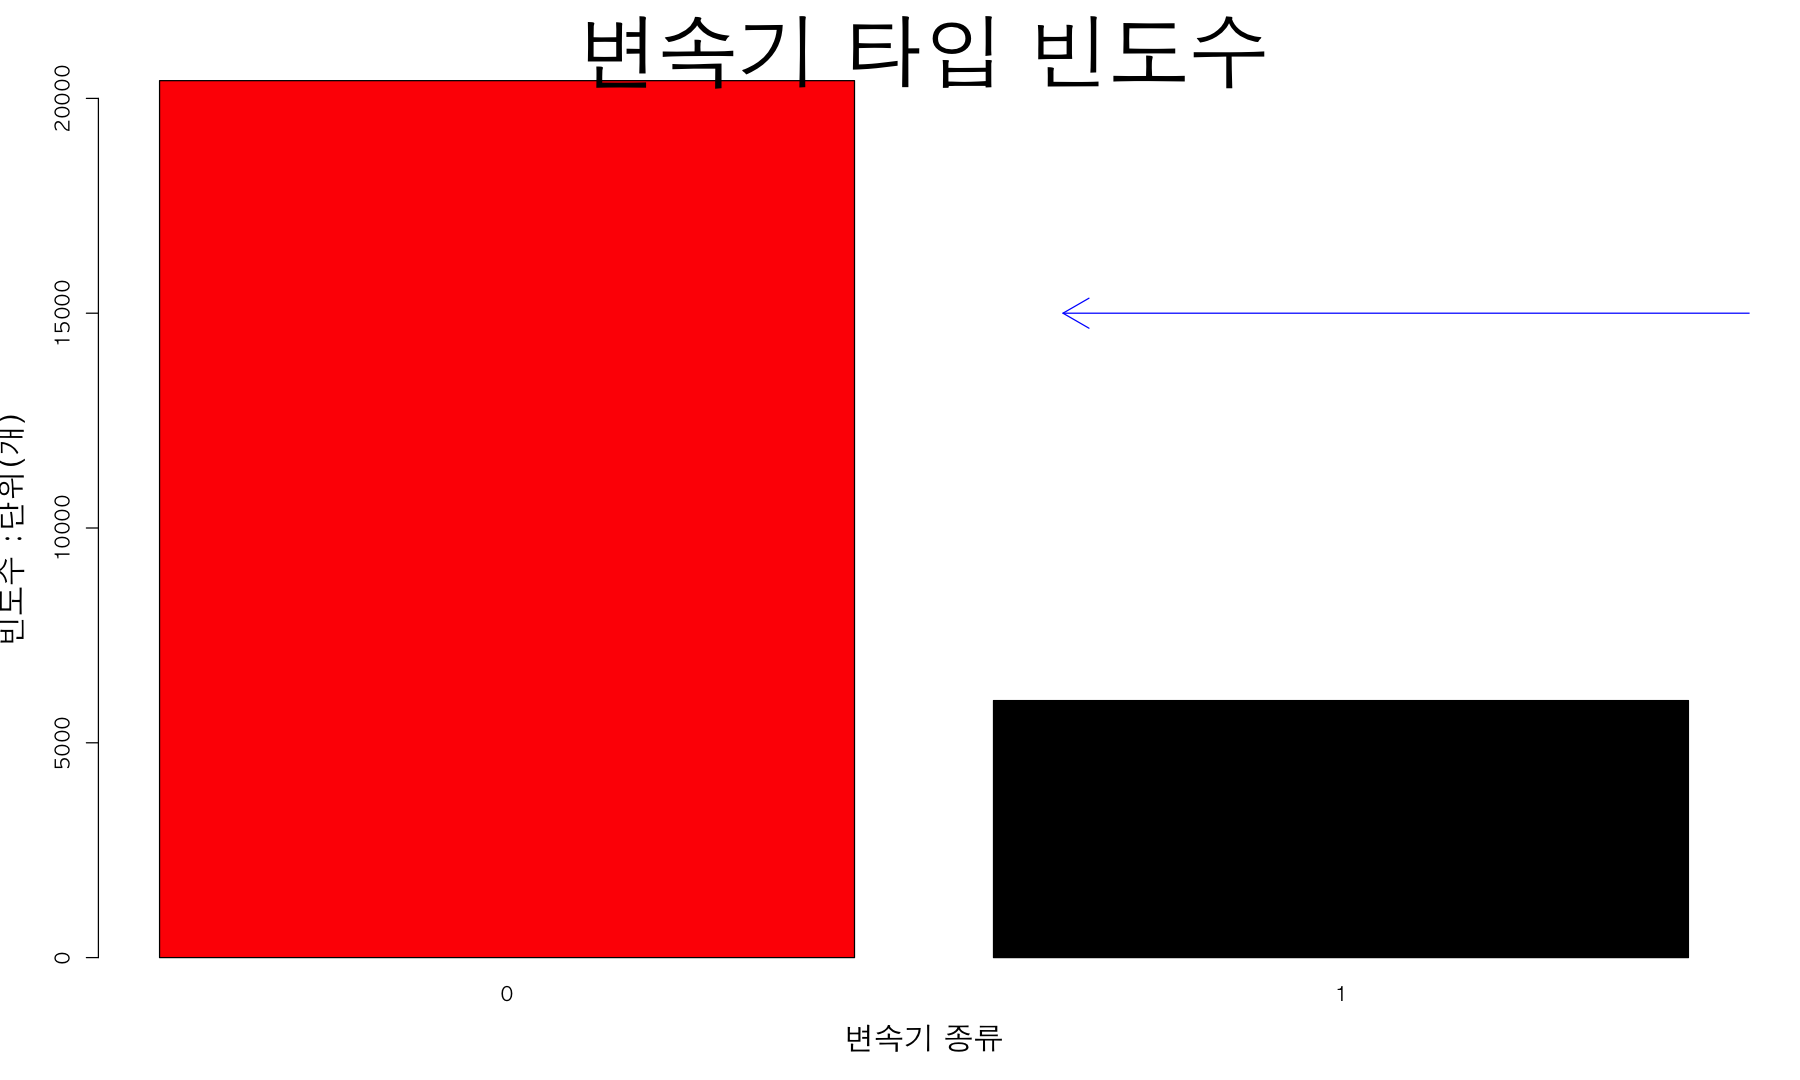

In [67]:
par(family = 'AppleGothic',bg= 'white')
barplot(table(benz$transmission_type),
main = '변속기 타입 빈도수',
ylim = c(0,20000),
xlab ='변속기 종류',
ylab = '빈도수 :단위(개)' ,
col = c('red',rep('black',2)), 
cex.main = 4,
cex.lab = 1.5
)
arrows(3, 15000, 1.5, 15000, col = "blue")
arrows(4.2 , 1000, 4.2, 9000 , )

text(4, 15000, "대체가능",  cex = 4 ,font = 2 , col = )


대체하기
Semi-automatic 은 제거(너무 적은 빈도수, 사용할거는 자동,수동)

In [68]:
benz$transmission_type <- ifelse(benz$transmission_type == 'Unknown', 'Automatic', benz$transmission_type)
benz  <- subset(benz, transmission_type != 'Semi-automatic')
table(benz$transmission_type)


    0     1 
20413  5983 

압도적으로 많은 오토로 대체함

In [69]:
head(subset(benz ,transmission_type == 'Unknown' ))

brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>


In [70]:
table(benz$fuel_type)


    1 
26396 

년도 데이터 정제

In [71]:
table(benz$year)


03/2015    1995    1996    1997    1998    1999    2000    2001    2002    2003 
      1      75     106     117     124     207     287     348     457     545 
   2004    2005    2006    2007    2008    2009    2010    2011    2012    2013 
    666     726     792     770     960     946    1061    1060    1019    1388 
   2014    2015    2016    2017    2018    2019    2020    2021    2022    2023 
   1617    1829    1763    1931    2065    1901    1282     827     877     641 
 Petrol 
      8 

In [72]:
 benz<- subset(benz, year != '10/2010')
benz <- subset(benz, year != 'Petrol')


In [73]:
table(benz$price_in_euro)


 Standhzg.       1000      10000     100000      10008     100320     100500 
         1         13         37          1          1          1          1 
     10099      10100     101400     101490     101500     101630     101777 
         1          2          1          1          1          1          1 
     10190     101990     101999      10200     102000     102480      10250 
         1          1          2          8          1          1          9 
    102500     102630     102750     102778     102800      10289     102890 
         1          1          1          1          1          1          2 
     10290     102900     102950      10298     102980      10299     102998 
         4          2          1          1          1          2          1 
     10300     103000     103350      10350     103500      10379     103800 
         5          1          1          1          1          1          1 
    103840     103890      10390     103950      10399     1039

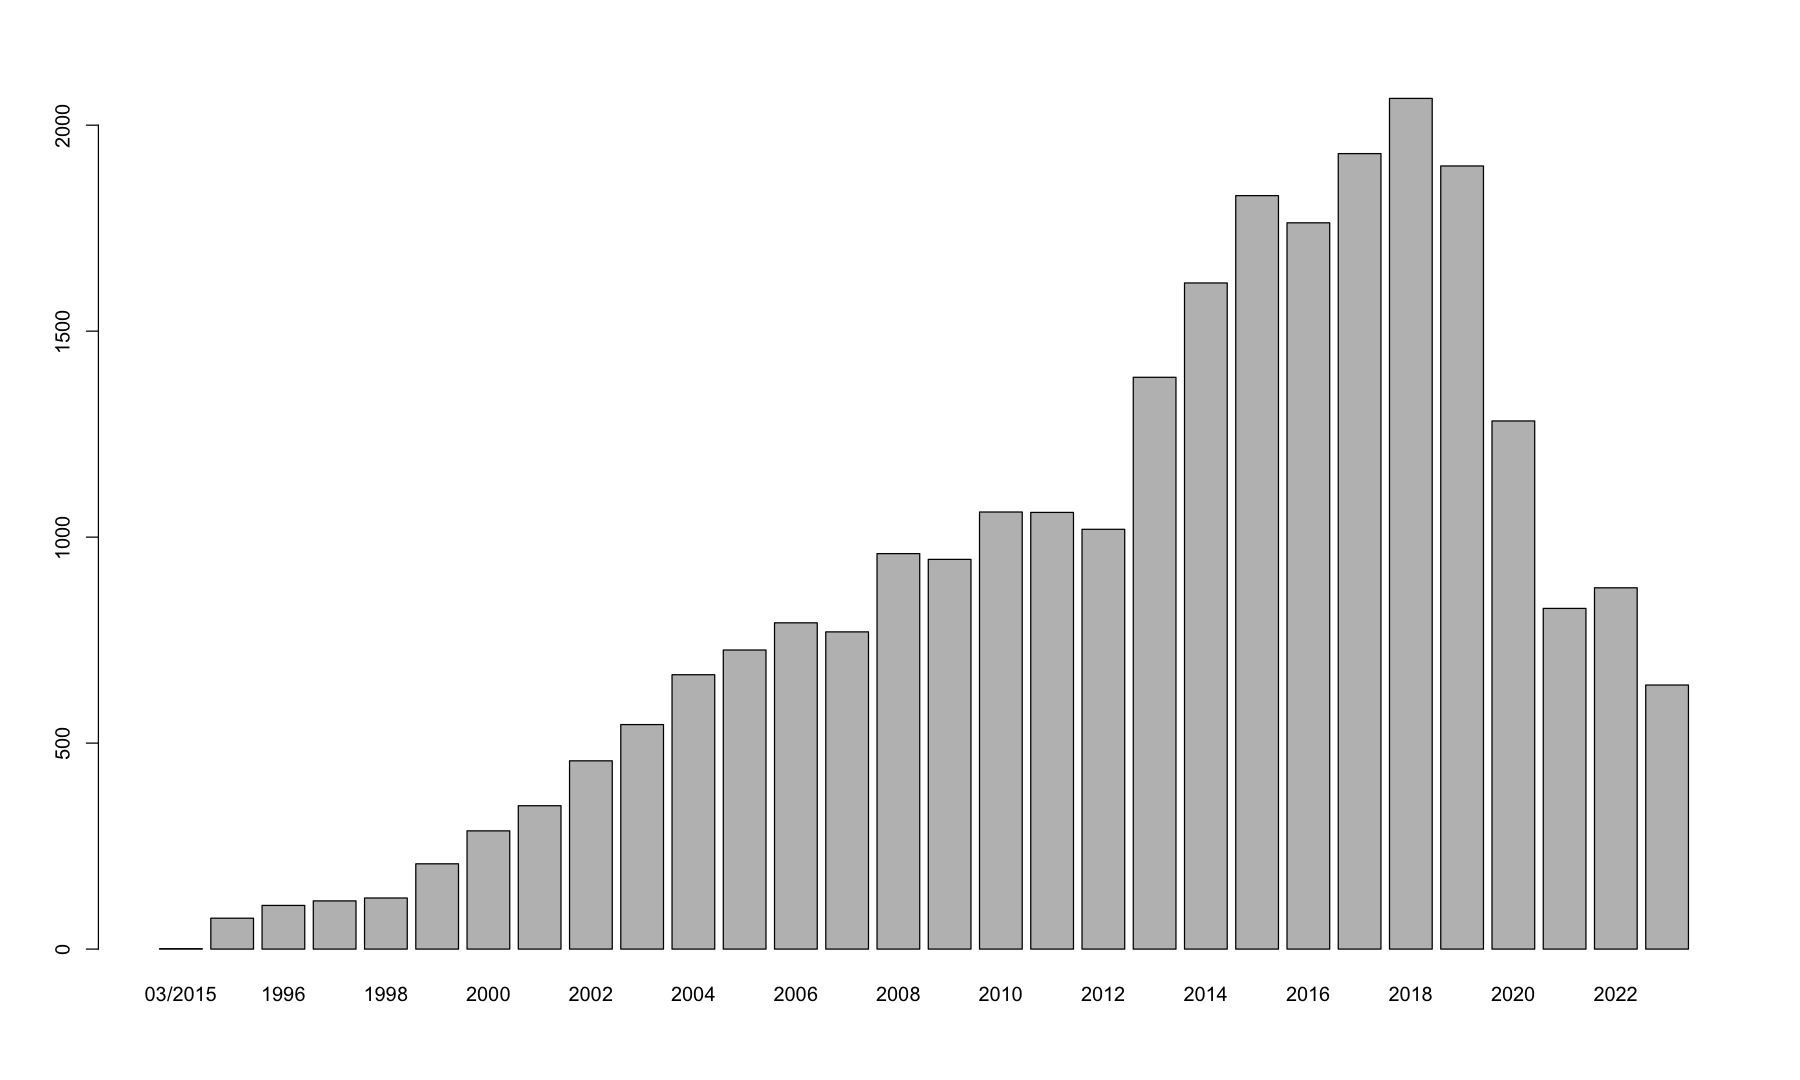

In [74]:
par(bg = 'white')
#par(mfrow = c(2,2))
barplot(table(benz$year))





In [75]:
table(benz$fuel_consumption_l_100km)


               - (l/100 km)  0 kWh/100 km    0 l/100 km    1 l/100 km 
         2407            52             8             2             4 
 1,3 l/100 km  1,4 l/100 km  1,7 l/100 km   10 l/100 km 10,1 l/100 km 
            1             1             1            75           132 
10,2 l/100 km 10,3 l/100 km 10,4 l/100 km 10,5 l/100 km 10,6 l/100 km 
           96           113           131            69            78 
10,7 l/100 km 10,8 l/100 km 10,9 l/100 km   11 l/100 km 11,1 l/100 km 
           38            87            82            61            55 
11,2 l/100 km 11,3 l/100 km 11,4 l/100 km 11,5 l/100 km 11,6 l/100 km 
           60            59            82           117            44 
11,7 l/100 km 11,8 l/100 km 11,9 l/100 km   12 l/100 km 12,1 l/100 km 
           77            47            96            73            47 
12,2 l/100 km 12,3 l/100 km 12,4 l/100 km 12,5 l/100 km 12,6 l/100 km 
           17           103            37            53            11 
12,7 

In [76]:
benz <- subset(benz, power_kw != '' )
benz <- subset(benz, fuel_consumption_l_100km != '' )
benz <- subset(benz, fuel_consumption_l_100km != '- (l/100 km)' )
benz <- subset(benz, fuel_consumption_l_100km != '(l/100 km)' )
benz <- subset(benz, fuel_consumption_l_100km != '0 (l/100 km)' )
benz <- subset(benz, fuel_consumption_l_100km != '- (g/km)' )
benz <- subset(benz, fuel_consumption_l_100km != '0 kg/100 km' )
benz <- subset(benz, fuel_consumption_l_100km != '0 l/100 km' )
benz <- subset(benz, fuel_consumption_l_100km != 'Diesel' )
benz <- subset(benz, fuel_consumption_l_100km != 'Petrol' )
benz <- subset(benz, fuel_consumption_l_100km != '2018' )
benz <- subset(benz, fuel_consumption_l_100km != '2015' )
benz <- subset(benz, fuel_consumption_l_100km != '2016' )
benz <- subset(benz, fuel_consumption_l_100km != '12/2011' )
benz <- subset(benz, fuel_consumption_l_100km != '12/2018' )

head(benz)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
102022,mercedes-benz,Mercedes-Benz SL 500,blue,1995,39900,235,320,0,1,"14,3 l/100 km",53334
102024,mercedes-benz,Mercedes-Benz E 220,blue,1995,4000,110,150,1,1,"8,7 l/100 km",197000
102029,mercedes-benz,Mercedes-Benz SL 320,blue,1995,14444,170,231,0,1,"8,5 l/100 km",264170
102035,mercedes-benz,Mercedes-Benz E 320,blue,1995,19900,162,220,0,1,"8,2 l/100 km",199000
102038,mercedes-benz,Mercedes-Benz G 300,blue,1995,32490,130,177,0,1,"12,1 l/100 km",64280
102042,mercedes-benz,Mercedes-Benz C 200,blue,1995,2200,100,136,1,1,"9,4 l/100 km",197000


연비 뒤에 붙는 단위 제거와 숫자화

In [77]:
benz$fuel_consumption_l_100km <- gsub(",", ".", benz$fuel_consumption_l_100km)
benz <- benz[benz$fuel_consumption_l_100km != '', ]
benz$fuel_consumption_l_100km <- as.numeric(gsub(" l/100 km", "", benz$fuel_consumption_l_100km))
table(benz$fuel_consumption_l_100km)


   1  1.3  1.4  1.7  2.1  2.5    3  3.3  3.5  3.6  3.7  3.8  3.9    4  4.1  4.2 
   4    1    1    1    5    4    1    1    4   11   32   47  110  249  183  260 
 4.3  4.4  4.5  4.6  4.7  4.8  4.9    5  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8 
 406  383  233  182  279  265  283  593  196  282  465  489  797  511  457  535 
 5.9    6  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9    7  7.1  7.2  7.3  7.4 
 575  536  803  562  425  631  388  501  517  575  505  294  359  403  424  348 
 7.5  7.6  7.7  7.8  7.9    8  8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9    9 
 443  346  255  338  401  228  172  341  178  258  207  175  306  205  242  125 
 9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9   10 10.1 10.2 10.3 10.4 10.5 10.6 
 233  232  230  302  154  272  206  107  176   75  132   96  113  131   69   78 
10.7 10.8 10.9   11 11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9   12 12.1 12.2 
  38   87   82   61   55   60   59   82  117   44   77   47   96   73   47   17 
12.3 12.4 12.5 12.6 12.7 12

In [78]:
#benz$fuel_consumption_l_100km <- as.numeric(gsub(",", ".", gsub("[^0-9.]", "", benz$fuel_consumption_l_100km)))
#benz <- na.omit(benz)

In [79]:
#benz$fuel_consumption_l_100km <- gsub("l/100 km", "", benz$fuel_consumption_l_100km)


In [80]:
benz <- na.omit(benz)
head(benz)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
102022,mercedes-benz,Mercedes-Benz SL 500,blue,1995,39900,235,320,0,1,14.3,53334
102024,mercedes-benz,Mercedes-Benz E 220,blue,1995,4000,110,150,1,1,8.7,197000
102029,mercedes-benz,Mercedes-Benz SL 320,blue,1995,14444,170,231,0,1,8.5,264170
102035,mercedes-benz,Mercedes-Benz E 320,blue,1995,19900,162,220,0,1,8.2,199000
102038,mercedes-benz,Mercedes-Benz G 300,blue,1995,32490,130,177,0,1,12.1,64280
102042,mercedes-benz,Mercedes-Benz C 200,blue,1995,2200,100,136,1,1,9.4,197000


In [81]:
table(benz$fuel_consumption_l_100km)


   1  1.3  1.4  1.7  2.1  2.5    3  3.3  3.5  3.6  3.7  3.8  3.9    4  4.1  4.2 
   4    1    1    1    5    4    1    1    4   11   32   47  110  249  183  260 
 4.3  4.4  4.5  4.6  4.7  4.8  4.9    5  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8 
 406  383  233  182  279  265  283  593  196  282  465  489  797  511  457  535 
 5.9    6  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9    7  7.1  7.2  7.3  7.4 
 575  536  803  562  425  631  388  501  517  575  505  294  359  403  424  348 
 7.5  7.6  7.7  7.8  7.9    8  8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9    9 
 443  346  255  338  401  228  172  341  178  258  207  175  306  205  242  125 
 9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9   10 10.1 10.2 10.3 10.4 10.5 10.6 
 233  232  230  302  154  272  206  107  176   75  132   96  113  131   69   78 
10.7 10.8 10.9   11 11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9   12 12.1 12.2 
  38   87   82   61   55   60   59   82  117   44   77   47   96   73   47   17 
12.3 12.4 12.5 12.6 12.7 12

In [82]:
head(sort(table(benz$model), decreasing = TRUE),5)


Mercedes-Benz C 180 Mercedes-Benz C 220 Mercedes-Benz C 200 Mercedes-Benz E 220 
               1281                1219                1218                 962 
Mercedes-Benz A 180 
                867 

In [83]:
benz$price_in_euro <- as.numeric(gsub("[^0-9.]", "", benz$price_in_euro))
head(table(benz$price_in_euro))


200 390 400 490 499 500 
  1   1   1   1   2   4 

In [84]:
head(data)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,alfa-romeo,Alfa Romeo GTV,red,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",160500
2,alfa-romeo,Alfa Romeo 164,black,1995,24900,191,260,Manual,Petrol,,190000
3,alfa-romeo,Alfa Romeo Spider,black,1995,5900,110,150,Unknown,Petrol,,129000
4,alfa-romeo,Alfa Romeo Spider,black,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",189500
5,alfa-romeo,Alfa Romeo 164,red,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",96127
6,alfa-romeo,Alfa Romeo Spider,red,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",47307


In [153]:
sort(table(C_180$color),decreasing = T)



silver  black   grey   blue  white    red  beige  brown  green   gold bronze 
   538    337    166     96     94     24     12      7      3      2      1 
violet 
     1 

one Hot incoding 실행

In [ ]:
benz$color_blue <- ifelse(benz$color == "blue", 1, 0)
benz$color_silver <- ifelse(benz$color == 'silver',1,0 )
benz$color_red <- ifelse(benz$color == 'red',1,0)
benz$color_grey <- ifelse(benz$color == 'grey',1,0 )
benz$color_black <- ifelse(benz$color == 'black',1,0 )
benz$color_white <- ifelse(benz$color == 'white',1,0 )

색깔 정제

In [92]:
table(par(family = 'AppleGothic',bg= 'white')
barplot(sort(table(C_180$color),decreasing = T)
,main = '밴츠 c_180 색깔 분포도',
 ylim = c(0,600),
 ylab = '빈도수 :단위(개)',
 xlab = '색깔',
 col = c(rep('red',6),rep('grey',9)),
 cex.main = 4,
 
)
text(3.8,400, "-----------------------------TOP6 사용----", srt = 320, col = 'red', cex = 2)


for(i in 1:length(sort(table(C_180$color),decreasing = T))) {
text((i-1)* 1.2 + 0.3,sort(table(C_180$color),decreasing = T)[i]+100, sort(table(C_180$color),decreasing = T)[i], pos =4 , col = 'black')

}$color)


        beige  black   blue bronze  brown   gold  green   grey orange    red 
     8    192   5902   2417     35    273     31    235   3836     18   1052 
silver violet  white yellow 
  6664     22   3103    122 

공백 발견

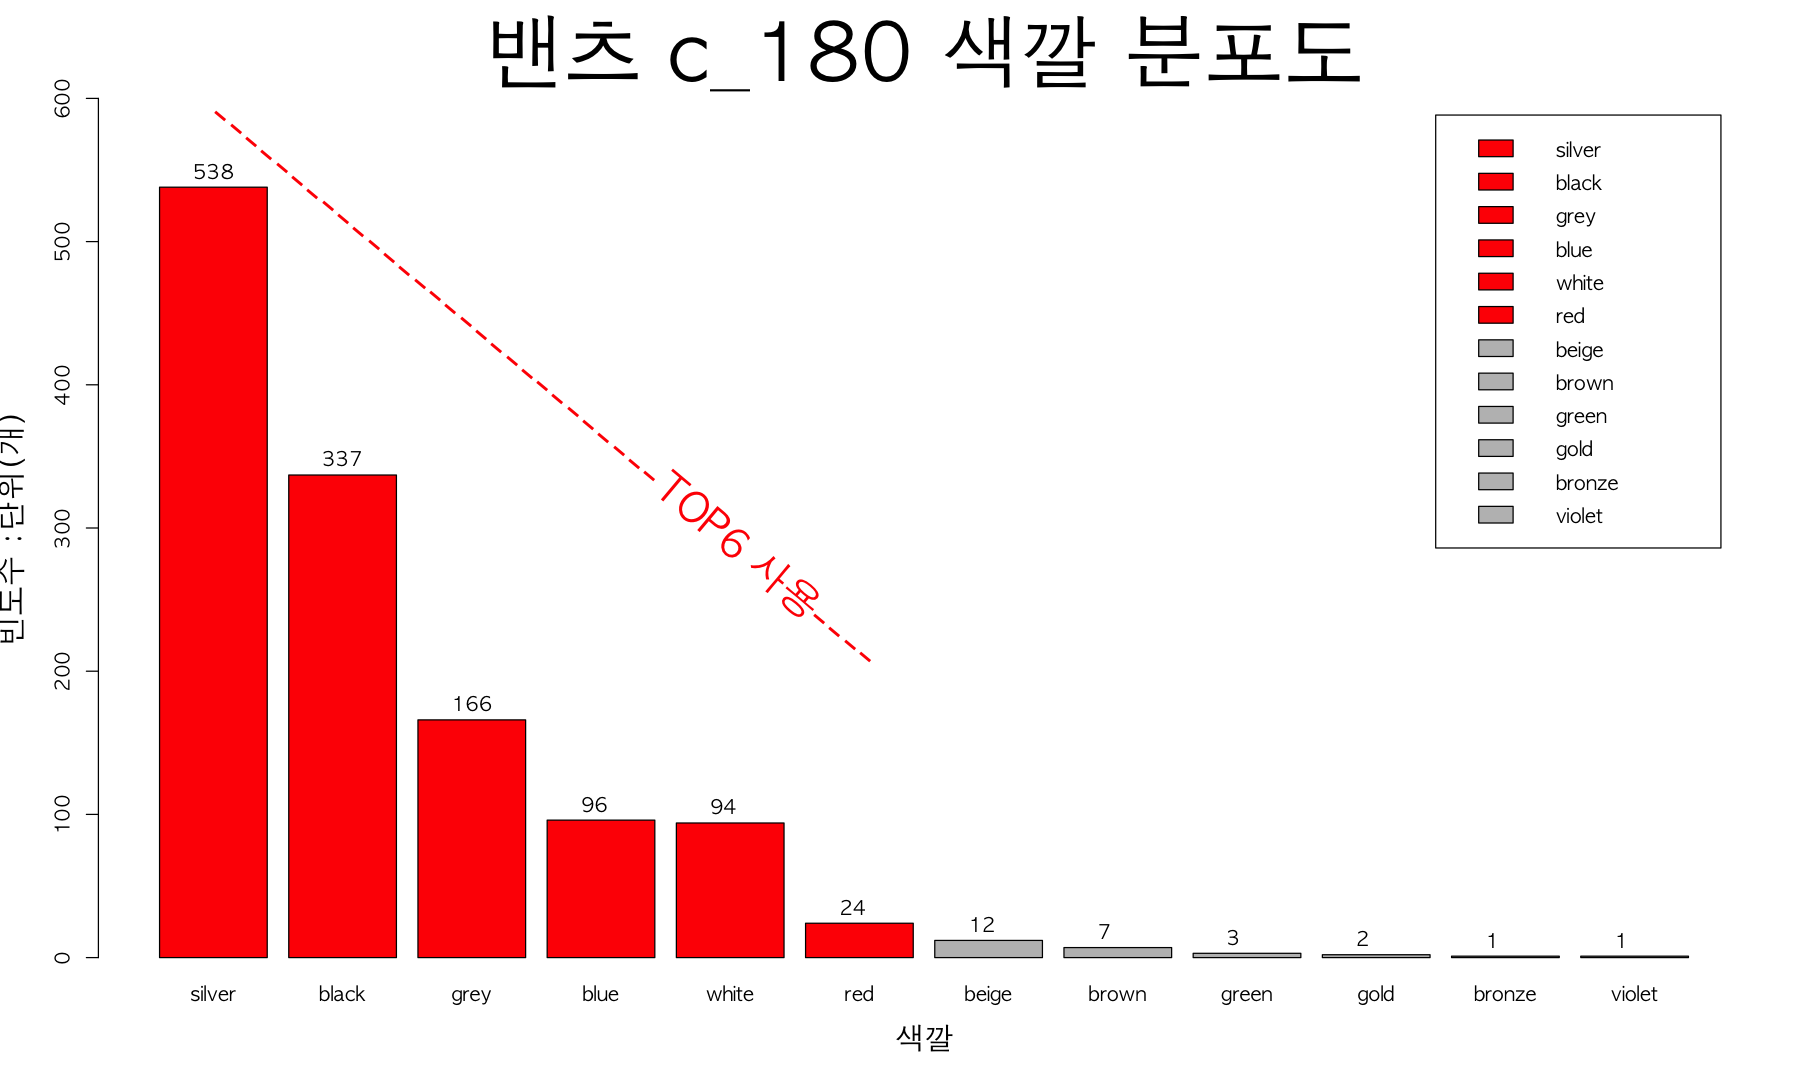

In [159]:
par(family = 'AppleGothic',bg= 'white')
barplot(sort(table(C_180$color),decreasing = T)
,main = '밴츠 c_180 색깔 분포도',
 ylim = c(0,600),
 ylab = '빈도수 :단위(개)',
 xlab = '색깔',
 col = c(rep('red',6),rep('grey',9)),
 cex.main = 4,
 legend.text = T,
 cex.lab = 1.5
)
text(3.8,400, "-----------------------------TOP6 사용----", srt = 320, col = 'red', cex = 2)


for(i in 1:length(sort(table(C_180$color),decreasing = T))) {
text((i-1)* 1.2 + 0.4,sort(table(C_180$color),decreasing = T)[i]+10, sort(table(C_180$color),decreasing = T)[i], pos =4 , col = 'black')
}

컬러값 정제

In [168]:
C_180 <- subset(C_180, table(color)[color] > 20)

sort(table(C_180$color),decreasing = T)


silver  black   grey   blue  white    red 
   538    337    166     96     94     24 

In [173]:
 C_180$year<- as.numeric(C_180$year)
 C_180$power_kw<- as.numeric(C_180$power_kw)
 C_180$power_ps<- as.numeric(C_180$power_ps)
head(C_180)

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
102062,mercedes-benz,Mercedes-Benz C 180,silver,1995,8500,90,122,0,1,9.2,73000
102069,mercedes-benz,Mercedes-Benz C 180,silver,1995,2800,90,122,0,1,9.2,210000
102070,mercedes-benz,Mercedes-Benz C 180,silver,1995,2950,90,122,1,1,9.2,94800
102082,mercedes-benz,Mercedes-Benz C 180,silver,1995,3500,90,122,1,1,9.2,260000
102098,mercedes-benz,Mercedes-Benz C 180,blue,1996,4500,90,122,0,1,9.2,102000
102103,mercedes-benz,Mercedes-Benz C 180,blue,1996,4000,90,122,0,1,9.2,105000


rds 파일을 모델별로 나누었기에 브랜드,모델 컬럼 삭제

In [174]:
C_180 <- C_180[,-c(1,2)]

In [175]:
head(C_180)

,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
102062,silver,1995,8500,90,122,0,1,9.2,73000
102069,silver,1995,2800,90,122,0,1,9.2,210000
102070,silver,1995,2950,90,122,1,1,9.2,94800
102082,silver,1995,3500,90,122,1,1,9.2,260000
102098,blue,1996,4500,90,122,0,1,9.2,102000
102103,blue,1996,4000,90,122,0,1,9.2,105000


one Hot Incoding 
색깔을 수치화 하고 증감과 관련이 없는 숫자이기에 one Hot Incoding  적용

In [178]:
C_180$color_blue <- ifelse(C_180$color == "blue", 1, 0)
C_180$color_silver <- ifelse(C_180$color == 'silver',1,0 )
C_180$color_red <- ifelse(C_180$color == 'red',1,0)
C_180$color_grey <- ifelse(C_180$color == 'grey',1,0 )
C_180$color_black <- ifelse(C_180$color == 'black',1,0 )
C_180$color_white <- ifelse(C_180$color == 'white',1,0 )

컬러 컬럼 삭제

In [180]:
C_180 <- C_180[,-1]
head(C_180)


,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,color_blue,color_silver,color_red,color_grey,color_black,color_white
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
102062,1995,8500,90,122,0,1,9.2,73000,0,1,0,0,0,0
102069,1995,2800,90,122,0,1,9.2,210000,0,1,0,0,0,0
102070,1995,2950,90,122,1,1,9.2,94800,0,1,0,0,0,0
102082,1995,3500,90,122,1,1,9.2,260000,0,1,0,0,0,0
102098,1996,4500,90,122,0,1,9.2,102000,1,0,0,0,0,0
102103,1996,4000,90,122,0,1,9.2,105000,1,0,0,0,0,0
